# Data Collection and EDA📈
## File Objective :
* Exploratory Data Analysis (EDA) is an important first step in data science projects. It involves looking at and visualizing data to understand its main features, find patterns, and discover how different parts of the data are connected.

PdDistrict
BAYVIEW       13681
CENTRAL       14067
INGLESIDE     11881
MISSION       18190
NORTHERN      16331
PARK           7610
RICHMOND       6850
SOUTHERN      24458
TARAVAL       10207
TENDERLOIN    12860
Name: MaxCrimeCount, dtype: int64


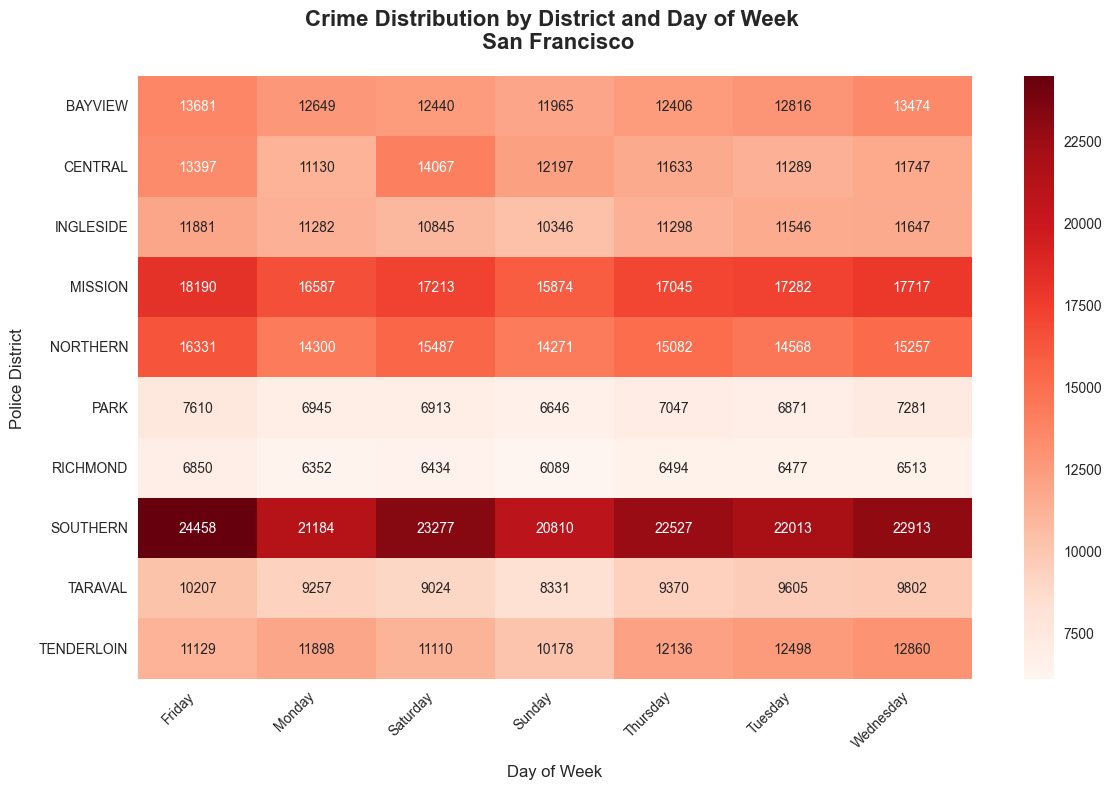

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# To activate % install library nbformat nbconvert ipykernel because % use in Jypter
%matplotlib inline
%run "Data_Understanding.ipynb"

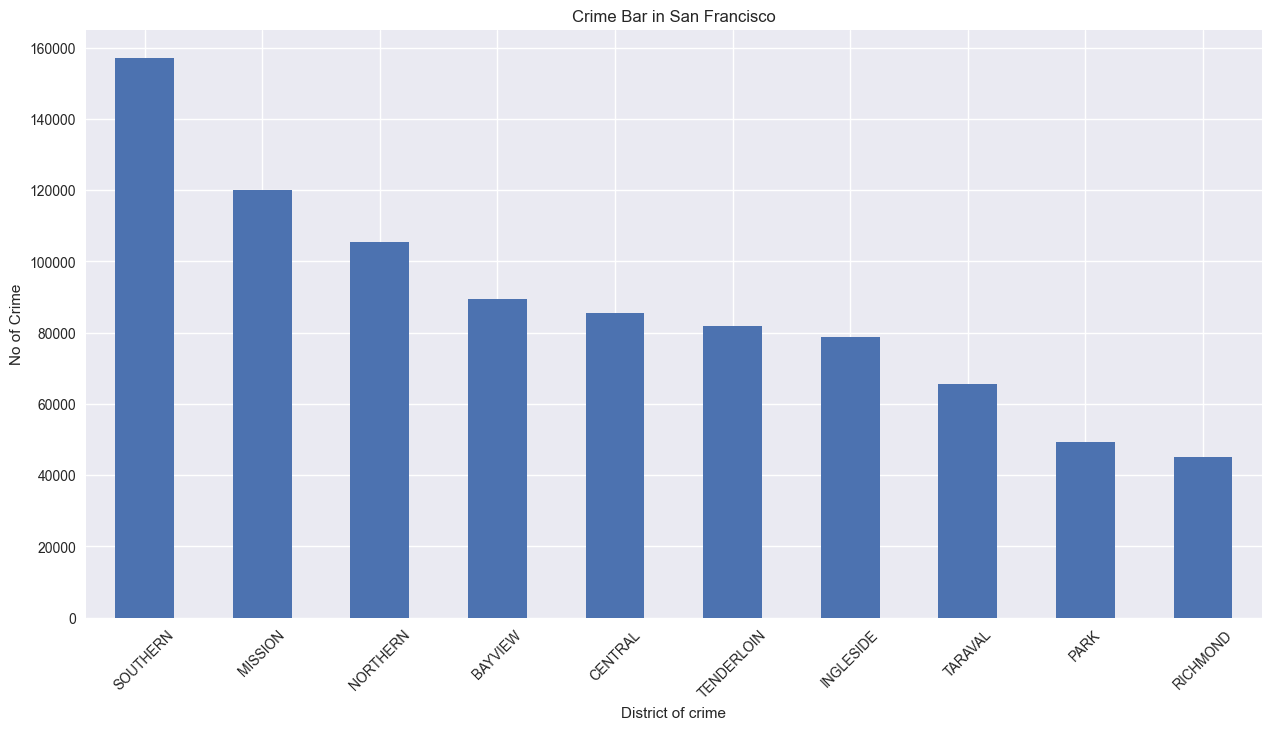

In [81]:
district_counts = data['PdDistrict'].value_counts()
plt.figure(figsize=(12,6))
district_counts.plot(kind='bar')
plt.title('Crime Bar in San Francisco')
plt.xlabel('District of crime')
plt.ylabel('No of Crime')
plt.xticks(rotation=45)
plt.show()

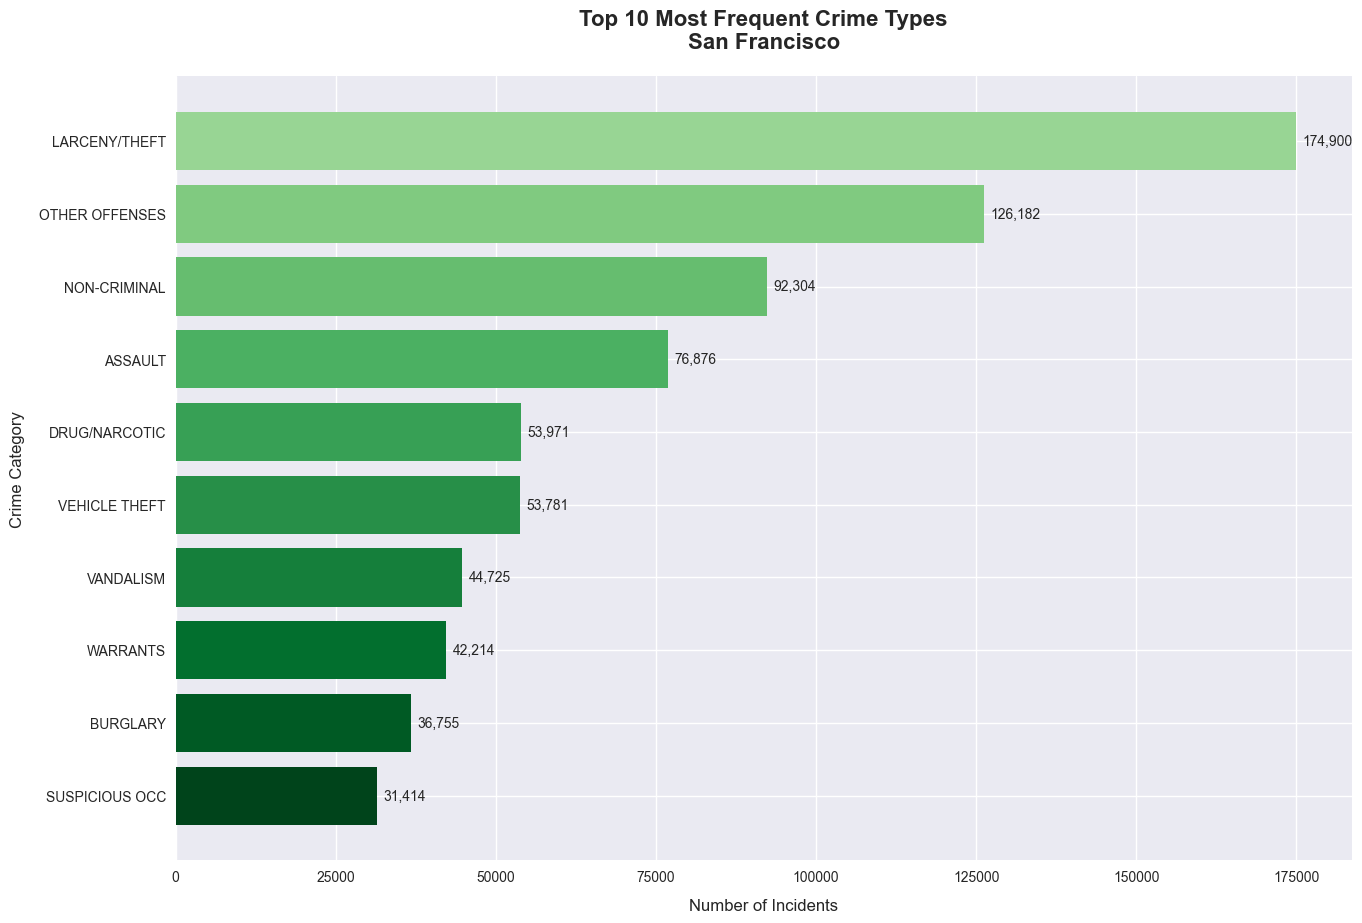

In [82]:

list_data = data['Category'].value_counts().head(10)
crime_data = pd.DataFrame({'Category': list_data.index, 'Count': list_data.values})

plt.figure(figsize=(12, 8))

bars = plt.barh(crime_data['Category'], crime_data['Count'],
                color=plt.cm.Greens(np.linspace(0.4, 1, len(crime_data))))

plt.title('Top 10 Most Frequent Crime Types\nSan Francisco', 
          fontsize=16, pad=20, weight='bold')
plt.xlabel('Number of Incidents', fontsize=12, labelpad=10)
plt.ylabel('Crime Category', fontsize=12, labelpad=10)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 1000, bar.get_y() + bar.get_height()/2,
             f'{width:,}',
             va='center', ha='left', fontsize=10)
plt.gca().invert_yaxis() 
plt.show()

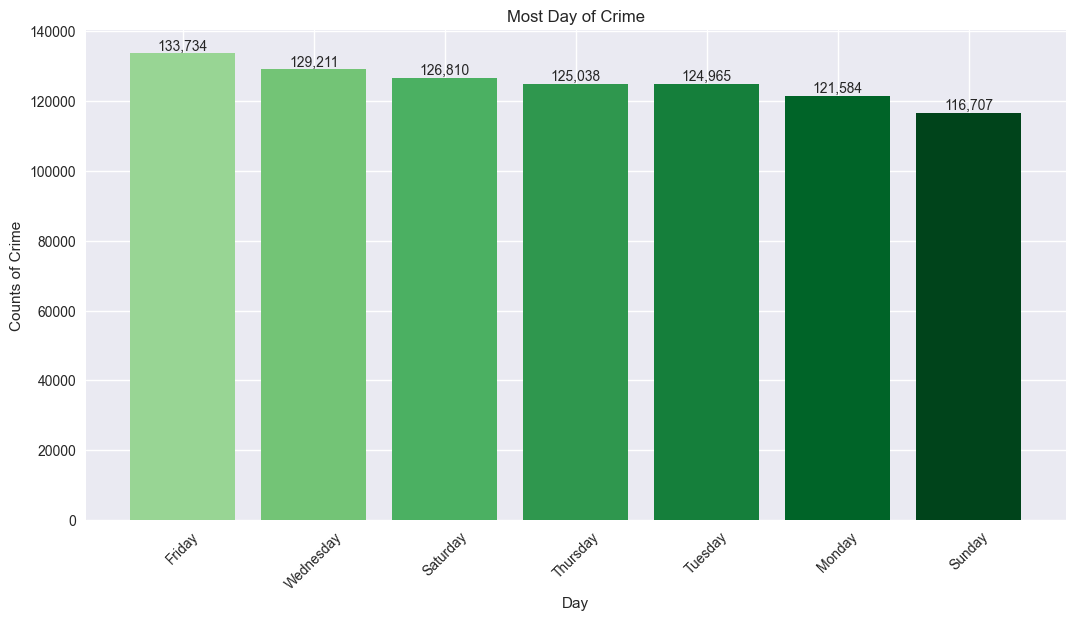

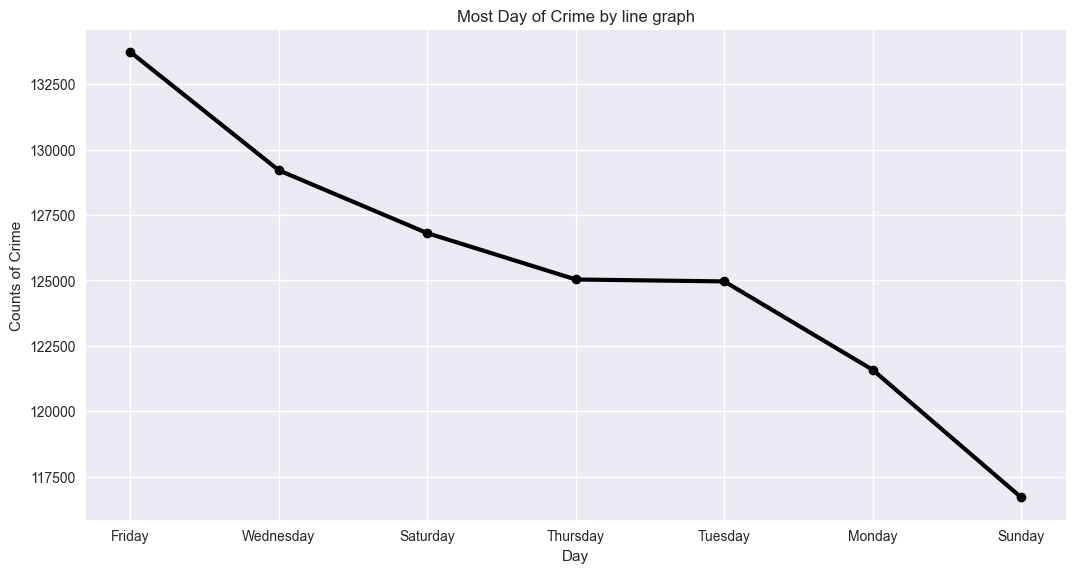

In [83]:

dayofweek_list = data['DayOfWeek'].value_counts()
nameofday = ['Friday','Wednesday','Saturday','Thursday','Tuesday','Monday','Sunday']

day_data = pd.DataFrame({'Day': nameofday, 'Count': dayofweek_list[nameofday].values})

plt.figure(figsize=(10,5))

bars = plt.bar(day_data['Day'], day_data['Count'], 
              color=plt.cm.Greens(np.linspace(0.4,1,len(day_data))))

plt.title('Most Day of Crime')
plt.xlabel('Day')
plt.ylabel('Counts of Crime')

# إصلاح نص التسميات
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)


plt.figure(figsize=(10,5))
dayofweek_list.plot(kind='line',color='black',marker='o',linewidth=3)
plt.title('Most Day of Crime by line graph')
plt.xlabel('Day')
plt.ylabel('Counts of Crime')


plt.show()

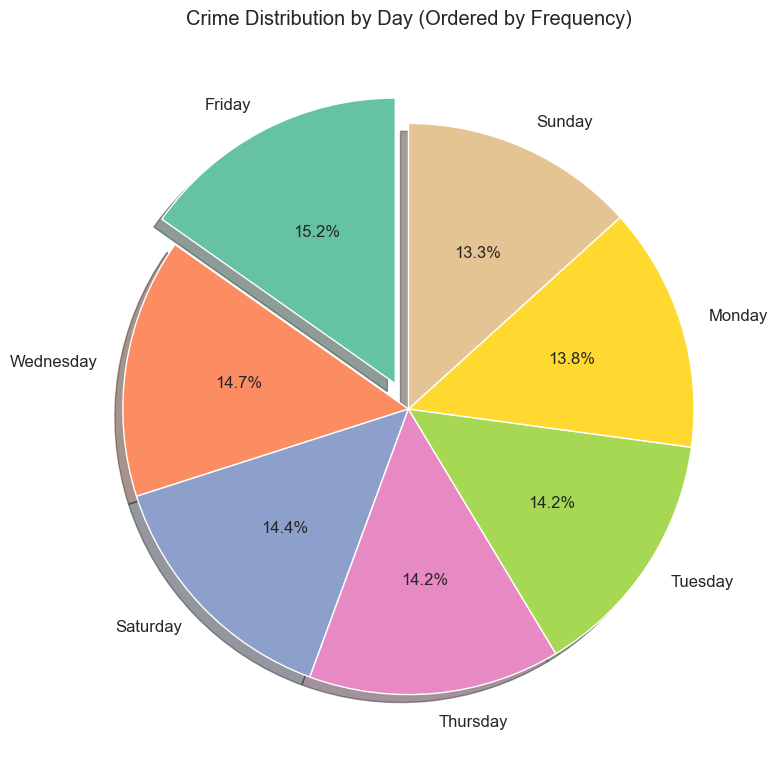

In [97]:

crime_by_day = data['DayOfWeek'].value_counts().sort_values(ascending=False)

days = crime_by_day.index.tolist() 
counts = crime_by_day.values.tolist()  

sns.set(font_scale=1.2)
plt.figure(figsize=(8, 8))

explode = [0.1 if day == days[0] else 0 for day in days]  
plt.pie(
    x=counts,
    labels=days,
    autopct='%1.1f%%',
    colors=sns.color_palette('Set2'),
    startangle=90,
    explode=explode,
    shadow=True,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)

plt.title('Crime Distribution by Day (Ordered by Frequency)', pad=20)
plt.tight_layout()
plt.show()